### Importing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('breast_cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = df.drop('id',axis=1)

### Exploratory Data Analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


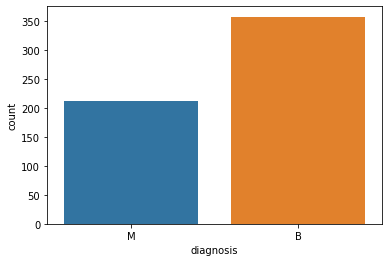

In [ ]:
sns.countplot(x='diagnosis', data=df);

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

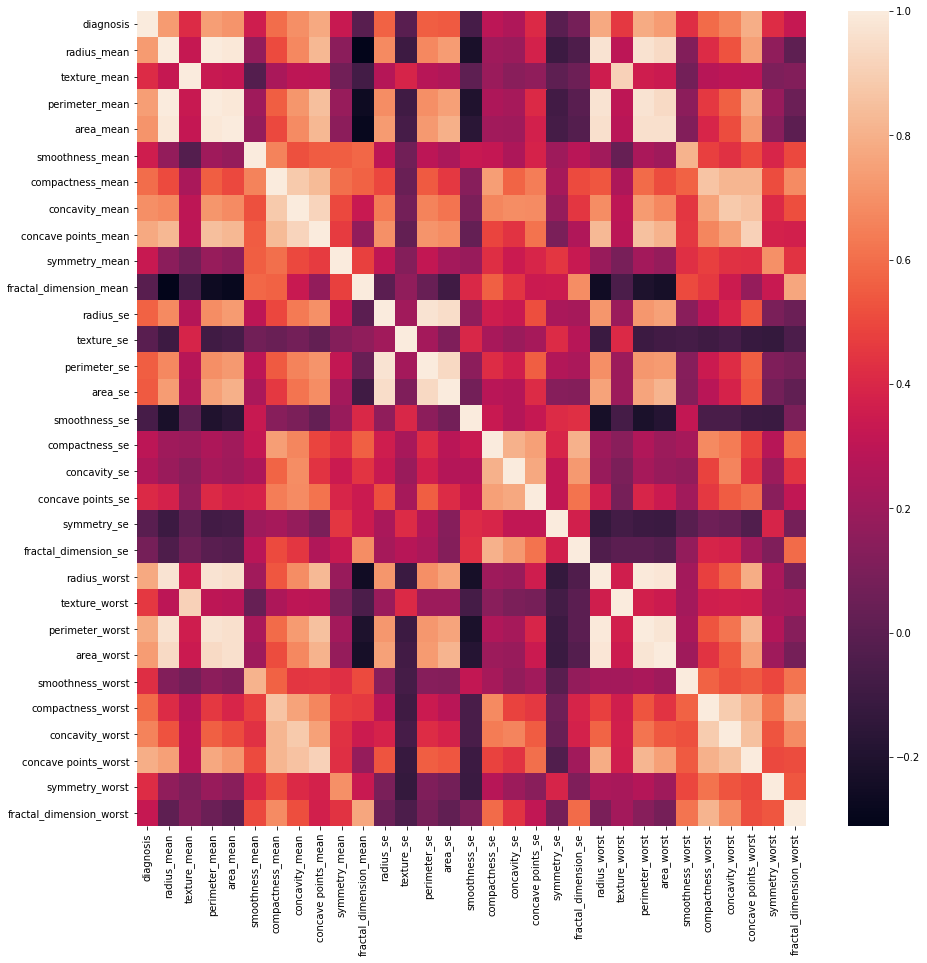

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr());

In [ ]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

### Scaling Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

### Creating Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 29ms/step - loss: 0.6639 - val_loss: 0.6393
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6228 - val_loss: 0.6027
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5861 - val_loss: 0.5669
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5424 - val_loss: 0.5217
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5017 - val_loss: 0.4697
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4661 - val_loss: 0.4155
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3968 - val_loss: 0.3619
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3567 - val_loss: 0.3156
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3216 - val_loss: 0.2811
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2841 - val_loss: 0.2484
Epoch 11

### Evaluating Loss

In [ ]:
losses = pd.DataFrame(model.history.history)

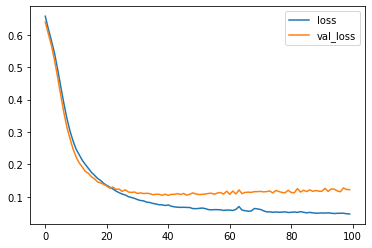

In [ ]:
losses.plot();

### Implementing Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=500, callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.6918 - val_loss: 0.6546
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6513 - val_loss: 0.6238
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6194 - val_loss: 0.5938
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5869 - val_loss: 0.5598
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5513 - val_loss: 0.5205
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5149 - val_loss: 0.4763
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4668 - val_loss: 0.4155
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4092 - val_loss: 0.3533
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3328 - val_loss: 0.3145
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3238 - val_loss: 0.2741
Epoch 11

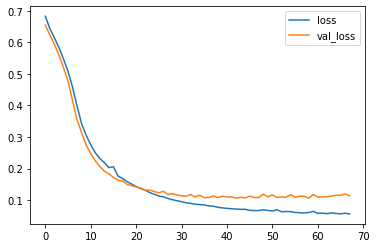

In [ ]:
losses_estop = pd.DataFrame(model.history.history)
losses_estop.plot()

### Implementing Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=500, callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 14ms/step - loss: 0.7081 - val_loss: 0.6644
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6567 - val_loss: 0.6514
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6793 - val_loss: 0.6398
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6663 - val_loss: 0.6273
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6402 - val_loss: 0.6142
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6547 - val_loss: 0.5994
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6399 - val_loss: 0.5862
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6112 - val_loss: 0.5710
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6116 - val_loss: 0.5558
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5789 - val_loss: 0.5395
Epoch 11

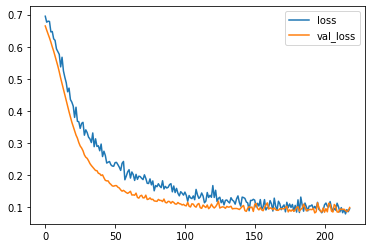

In [ ]:
losses_drop = pd.DataFrame(model.history.history)
losses_drop.plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.93      0.98      0.96        55

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[84  4]
 [ 1 54]]
